## Google Search Data Analysis using the pytrends API 

### pytrends API: https://pypi.org/project/pytrends/

In [1]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme()

In [27]:
#connect to google
pytrends = TrendReq(hl='en-US', tz=360)

#keywords list to search for
kw_list = ['facebook', 'coronavirus', 'youtube', 'amazon']
pytrends.build_payload(kw_list)

#dataframe
df = pytrends.interest_over_time()
df.head()

,facebook,coronavirus,youtube,amazon,isPartial
date,,,,,
2017-05-07,74,0,40,10,False
2017-05-14,73,0,39,9,False
2017-05-21,72,0,39,9,False
2017-05-28,71,0,40,9,False
2017-06-04,69,0,39,9,False


### "Interest over time" line graphs for several search keywords

Text(0.5, 1.0, 'Search Trends for Several Keywords')

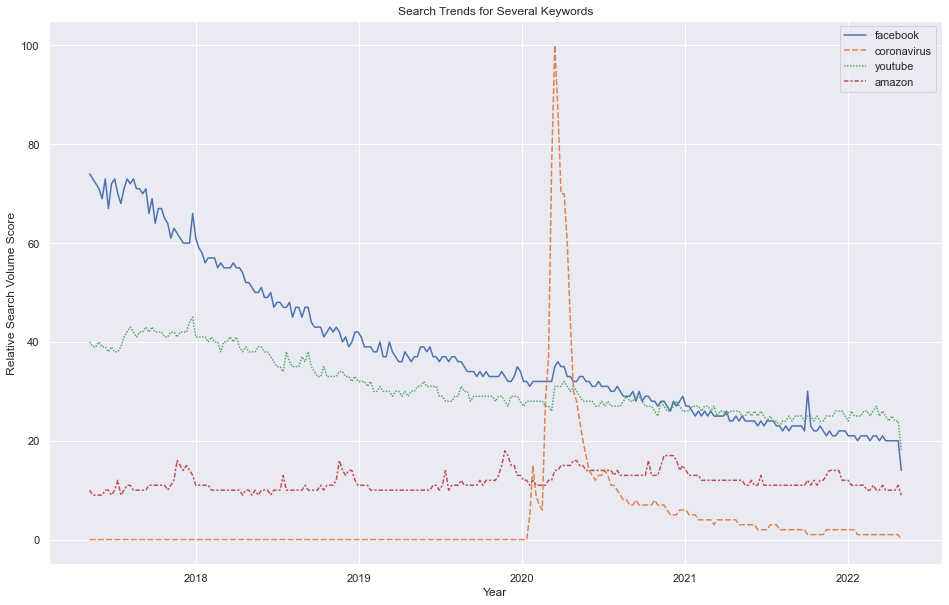

In [3]:
plt.figure(figsize=(16,10))
trend_plot = sns.lineplot(data=df[['facebook', 'coronavirus', 'youtube', 'amazon']])
trend_plot.set_xlabel("Year")
trend_plot.set_ylabel("Relative Search Volume Score")
trend_plot.set_title('Search Trends for Several Keywords')

### Regional Interest of Search Trends

In [7]:
df_region = pytrends.interest_by_region()
df_region = df_region.sort_values(by='coronavirus', ascending=False).reset_index()
df_region.head(10)

,geoName,facebook,coronavirus,youtube,amazon
0,Argentina,67,5,27,1
1,South Africa,66,6,26,2
2,Venezuela,66,1,31,2
3,Poland,63,0,36,1
4,Peru,61,4,34,1
5,Portugal,60,3,34,3
6,Ecuador,59,2,36,3
7,Brazil,56,4,37,3
8,Dominican Republic,55,3,35,7
9,Mexico,55,3,36,6


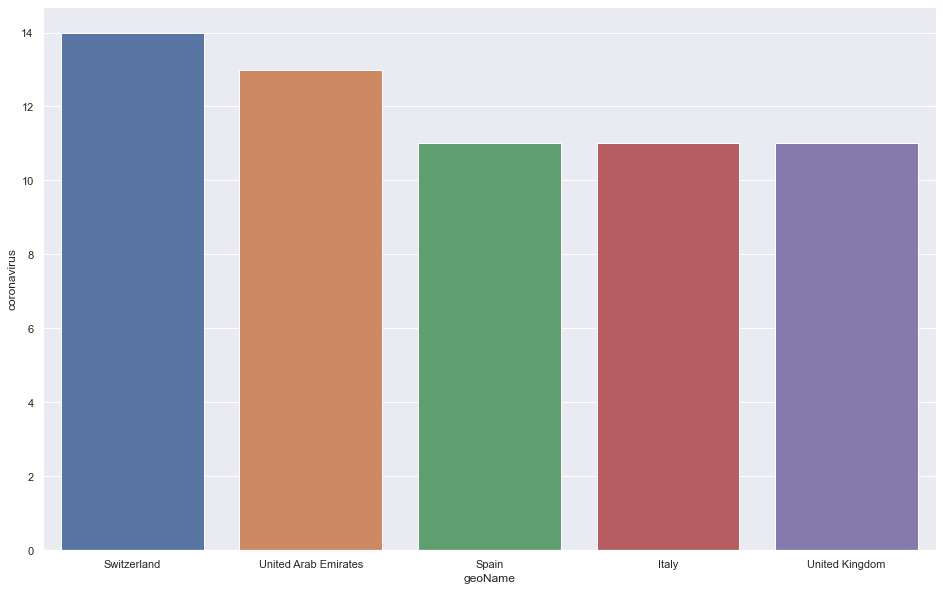

In [5]:
plt.figure(figsize=(16,10))
bar_plot = sns.barplot(x="geoName", y="coronavirus", data=df_region[['geoName','coronavirus']].head(5))

In [28]:
fig = px.choropleth(df_region, locations="geoName",
                    locationmode='country names',
                    color="coronavirus", 
                    hover_name="geoName",
                    color_continuous_scale="blues",
                    labels={"coronavirus": "Search Score", "geoName": "Country"})
fig.update_layout(
    title_text = 'Relative Search Volume Scores for "coronavirus" in different countries',
)
fig.show()

![Plot](plots/chloropleth_search_trends.png)